<a href="https://colab.research.google.com/github/hnouraei/AppliedDataAnalysis/blob/master/Working_with_Dates_and_Times.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dates and Calendars 

Dates has a special class in python similart to numbers or strings 


Recap: Dates and Calendars
The date() class takes a year, month, and day as arguments
A date object has accessors like .year , and also methods like .weekday()
date objects can be compared like numbers, using min() , max() , and sort()
You can subtract one date from another to get a timedelta
To turn date objects into strings, use the .isoformat() or .strftime() methods

Recap: Combining Dates and Times
The datetime() class takes all the arguments of date() , plus an hour, minute, second, and
microsecond
All of the additional arguments are optional; otherwise, they're set to zero by default
You can replace any value in a datetime with the .replace() method
Convert a timedelta into an integer with its .total_seconds() method
Turn strings into dates with .strptime() and dates into strings with .strftime()

Recap: Timezones and Daylight Saving
A datetime is "timezone aware" when it has its tzinfo set. Otherwise it is "timezone
naive"
Setting a timezone tells a datetime how to align itself to UTC, the universal time standard 
use the .replace() method to change the timezone of a datetime, leaving the date and time the same 
use the .astimezone() method to shift the date and time to match the new timezone 
dateutil.tz provides a comprehensive, updated timezone database 

Recap: Easy and Powerful Timestamps in Pandas
When reading a csv, set the parse_dates argument to be the list of columns which should
be parsed as datetimes
If setting parse_dates doesnot work, use the pd.to_datetime() function 
grouping rows with .groupby lets you calculate aggregates per group. For example .first(),.min() or .mean()
.resample() groups rows on the basis of a datetime column, by year, month, day, and so on 
use .tz_localize() to set a timezone, keeping the date and time the same 
use .tz_convert to change the date and time to match a new timezone 

## Creating date objects, datetime.date()

In [ ]:
# Import date 
from datetime import date
# Create dates 
two_hurricanes_dates = [date(2016,10,7), date(2017, 6,21)]

print (two_hurricanes_dates)

[datetime.date(2016, 10, 7), datetime.date(2017, 6, 21)]


## Attributes of a date (year,month, day)

In [ ]:
# Import date
from datetime import date
# Create dates
two_hurricanes_dates = [date(2016, 10, 7), date(2017, 6, 21)]
print(two_hurricanes_dates[0].year)
print(two_hurricanes_dates[0].month)
print(two_hurricanes_dates[0].day)

2016
10
7


## Finding the weekday of a date

In [ ]:
print(two_hurricanes_dates[0].weekday())

4


## strftime() Method for formatting date objects into readable strings

### Note: A reference of all the legal format codes:

https://www.w3schools.com/python/python_datetime.asp

In [ ]:
print (date(2016, 10, 7).strftime("%B"))

October


## Math with Dates

In [ ]:
# Import date
from datetime import date
# Create our dates
d1 = date(2017, 11, 5)
d2 = date(2017, 12, 4)
l = [d1, d2]

print(min(l))

2017-11-05

In [ ]:
# Subtract two dates
delta = d2 - d1

print(delta.days)
29

### timedelta function

In [ ]:
# timedelta function 
from datetime import timedelta, date 

d1 = date(2017, 11, 5)
# create a 29 day timedelta 
td= timedelta (days=29)
print(d1+td)

2017-12-04


# Turning dates into strings

## ISO 8601 format

In [ ]:
from datetime import date
# Example date
d = date(2017, 11, 5)
# ISO format: YYYY-MM-DD
print(d)

2017-11-05


In [ ]:
# Express the date in ISO 8601 format and put it in a list
print( [d.isoformat()] )

['2017-11-05']


In [ ]:
# A few dates that computers once had trouble with
some_dates = ['2000-01-01', '1999-12-31']
# Print them in order
print(sorted(some_dates))

['1999-12-31', '2000-01-01']


## Every other format except ISO 8601 using .strftime() method 

### Note: with strftime() method, format should be specified "%Y %m %d" or "%B" ,...

In [ ]:
# Example: 
d = date(2017, 11, 5)
d.strftime ("%Y %m %d")

'2017 11 05'

In [ ]:
# Example date
d = date(2017, 1, 5)
print(d.strftime("%Y"))

2017


In [ ]:
# Format string with more text in it
print(d.strftime("Year is %Y"))

Year is 2017


# Combining Dates and Times 

## Adding time to the mix

In [ ]:
# Import datetime, computer time is in 24 hours. 500000 is in micro seconds which is going to be 0.5 seconds. 
from datetime import datetime
dt = datetime(2017, 10, 1, 15, 23, 25, 500000)
dt

datetime.datetime(2017, 10, 1, 15, 23, 25, 500000)

In [ ]:
# Import datetime
from datetime import datetime
dt = datetime(year=2017,
              month=10,
              day=1,
              hour=15,
              minute=23,
              second=25,
              microsecond=500000)

## Replacing parts of a datetime

In [ ]:
dt_hr = dt.replace(minute=0, second=0, microsecond=0)
print(dt_hr)

2017-10-01 15:00:00


## Printing and parsing datetimes

In [ ]:
# Create datetime
dt = datetime(2017, 12, 30, 15, 19, 13)
print(dt.strftime("%Y-%m-%d"))

2017-12-30


In [ ]:
print(dt.strftime("%Y-%m-%d %H:%M:%S"))

2017-12-30 15:19:13


### ISO 8601 Format

In [ ]:
# ISO 8601 format
print(dt.isoformat())

2017-12-30T15:19:13


### datetimes from string

#### .strptime()

Note: 
we need the exact match to do string conversion, otherwise it generates error. if it has /,:,- we should include them. 

In [ ]:
# Import datetime
from datetime import datetime
dt = datetime.strptime("12/30/2017 15:19:13",
"%m/%d/%Y %H:%M:%S")
print(dt)

2017-12-30 15:19:13


## Parsing datetimes from timestamp

In [ ]:
# A timestamp (unix time stap)

ts = 1514665153.0
# Convert to datetime and print
print(datetime.fromtimestamp(ts))

2017-12-30 15:19:13


# Working with durations

In [ ]:
# Create example datetimes
start = datetime(2017, 10, 8, 23, 46, 47)
end = datetime(2017, 10, 9, 0, 10, 57)
# Subtract datetimes to create a timedelta
duration = end - start

In [ ]:
# Subtract datetimes to create a timedelta
print(duration.total_seconds())

1450.0


## Creating timedeltas

In [ ]:
# Import timedelta
from datetime import timedelta
# Create a timedelta
delta1 = timedelta(seconds=1)

print(start)

# One second later
print(start + delta1)

2017-10-08 23:46:47
2017-10-08 23:46:48


In [ ]:
# Create a one day and one second timedelta
delta2 = timedelta(days=1, seconds=1)
print(start)

# One day and one second later
print(start + delta2)


2017-10-08 23:46:47
2017-10-09 23:46:48


## Negative timedeltas

In [ ]:
# Create a negative timedelta of one week
delta3 = timedelta(weeks= -1)
print(start)

# One week earlier
print(start + delta3)


2017-10-08 23:46:47
2017-10-01 23:46:47


# Time zones and Daylight Saving 

## UTC offsets

In [ ]:
# Import relevant classes
from datetime import datetime, timedelta, timezone
# US Eastern Standard time zone
ET = timezone(timedelta(hours=-5))
# Timezone-aware datetime
dt = datetime(2017, 12, 30, 15, 9, 3, tzinfo = ET)
print(dt)

2017-12-30 15:09:03-05:00


In [ ]:
# setting the tzinfo to UTC by using timezone.utc
dt = datetime(2017, 12, 30, 15, 9, 3, tzinfo = timezone.utc)
print(dt)

2017-12-30 15:09:03+00:00


In [ ]:
# India Standard time zone
IST = timezone(timedelta(hours=5, minutes=30))
# Convert to IST
print(dt.astimezone(IST))

2017-12-31 01:39:03+05:30


### Adjusting timezone vs changing tzinfo

In [ ]:
print(dt)
'2017-12-30 15:09:03-05:00'
print(dt.replace(tzinfo=timezone.utc))
'2017-12-30 15:09:03+00:00'
# Change original to match UTC
print(dt.astimezone(timezone.utc))
'2017-12-30 20:09:03+00:00'

## UTC Offsets

### Time zone database

In [ ]:
# Imports
from datetime import datetime
from dateutil import tz
# Eastern time
et = tz.gettz('America/New_York')

In [ ]:
# Usaing Time zone database
# Last ride
last = datetime(2017, 12, 30, 15, 9, 3, tzinfo=et)
print(last)

2017-12-30 15:09:03-05:00


In [ ]:
# Last ride
last = datetime(2017, 12, 30, 15, 9, 3, tzinfo=et)
print(last)
'2017-12-30 15:09:03-05:00'
# First ride
first = datetime(2017, 10, 1, 15, 23, 25, tzinfo=et)
print(first)
'2017-10-01 15:23:25-04:00'

2017-12-30 15:09:03-05:00
2017-10-01 15:23:25-04:00


'2017-10-01 15:23:25-04:00'

## Daylight Saving 

### Start of Daylight Saving Time 

In [ ]:
spring_ahead_159am = datetime(2017, 3, 12, 1, 59, 59)
spring_ahead_159am.isoformat()
'2017-03-12T01:59:59'
spring_ahead_3am = datetime(2017, 3, 12, 3, 0, 0)
spring_ahead_3am.isoformat()
'2017-03-12T03:00:00'
(spring_ahead_3am - spring_ahead_159am).total_seconds()
3601

3601

In [ ]:
# Start of Daylight Saving Time
from datetime import timezone, timedelta
EST = timezone(timedelta(hours=-5))
EDT = timezone(timedelta(hours=-4))

In [ ]:
# Start of Daylight Saving Time
spring_ahead_159am = spring_ahead_159am.replace(tzinfo = EST)
spring_ahead_159am.isoformat()
'2017-03-12T01:59:59-05:00'
spring_ahead_3am = spring_ahead_159am.replace(tzinfo = EDT)
spring_ahead_3am.isoformat()
'2017-03-12T03:00:00-04:00'
(spring_ahead_3am - spring_ahead_159am).seconds

82800

In [ ]:
# Start of Daylight Saving Time instead of manual daytime saving adjusting
# Using dateutil
# Import tz
from dateutil import tz
# Create eastern timezone
eastern = tz.gettz('America/New_York')
# 2017-03-12 01:59:59 in Eastern Time (EST)
spring_ahead_159am = datetime(2017, 3, 12, 1, 59, 59,
tzinfo = eastern)
# 2017-03-12 03:00:00 in Eastern Time (EDT)
spring_ahead_3am = datetime(2017, 3, 12, 3, 0, 0,
tzinfo = eastern)

In [ ]:
(spring_ahead_3am - spring_ahead_159am).seconds

3601

In [ ]:
(spring_ahead_3am - spring_ahead_159am).total_seconds()

3601.0

###  Ending Daylight Saving Time

dateutil.tz.enfold(dt, fold=1)
Provides a unified interface for assigning the fold attribute to datetimes both before and after 
the implementation of PEP-495.

Parameters:	fold – The value for the fold attribute in the returned datetime. This should be either 0 or 1.
Returns:	Returns an object for which getattr(dt, 'fold', 0) returns fold for all versions of Python. In versions prior to Python 3.6, this is a _DatetimeWithFold object, which is a subclass of datetime.datetime with the fold attribute added, if fold is 1.

In [ ]:
eastern = tz.gettz('US/Eastern')
# 2017-11-05 01:00:00
first_1am = datetime(2017, 11, 5, 1, 0, 0,
tzinfo = eastern)
tz.datetime_ambiguous(first_1am)
True
# 2017-11-05 01:00:00 again
second_1am = datetime(2017, 11, 5, 1, 0, 0,
tzinfo = eastern)
#enfold only mark the second daytime because we found that the date time is ambiguous and it is not changing 
# anything. We must  convert to UTC after that to be un ambiguous. 
second_1am = tz.enfold(second_1am)

Example: Cleaning daylight saving data with fold
As we've just discovered, there is a ride in our data set which is being messed up by a Daylight Savings shift. Let's clean up the data set so we actually have a correct minimum ride length. We can use the fact that we know the end of the ride happened after the beginning to fix up the duration messed up by the shift out of Daylight Savings.

Since Python does not handle tz.enfold() when doing arithmetic, we must put our datetime objects into UTC, where ambiguities have been resolved.

onebike_datetimes is already loaded and in the right timezone. tz and timezone have been imported. Use tz.UTC for the timezone.

Complete the if statement to be true only when a ride's start comes after its end.
When start is after end, call tz.enfold() on the end so you know it refers to the one after the daylight savings time change.
After the if statement, convert the start and end to UTC so you can make a proper comparison.

In [ ]:
trip_durations = []
for trip in onebike_datetimes:
  # When the start is later than the end, set the fold to be 1
  if trip['start'] > trip['end']:
    trip['end'] = tz.enfold(trip['end'])
  # Convert to UTC
  start = trip['start'].astimezone(tz.UTC)
  end = trip['end'].astimezone(tz.UTC)

  # Subtract the difference
  trip_length_seconds = (end-start).total_seconds()
  trip_durations.append(trip_length_seconds)

# Take the shortest trip duration
print("Shortest trip: " + str(min(trip_durations)))


Shortest trip: 116.0

In [ ]:
(first_1am-second_1am).total_seconds()

0.0

In [ ]:
# In order to account for daylight saving time, we must convert everything to UTC otherwise, the code does 
# not account for daylight saving time changes 
first_1am = first_1am.astimezone(tz.UTC)
second_1am = second_1am.astimezone(tz.UTC)
(second_1am - first_1am).total_seconds()

3600.0

# Dates and Times in Pandas

## Reading date and time data in Pandas

In [ ]:
# A simple Pandas example
# Load Pandas
import pandas as pd
# Import W20529's rides in Q4 2017
rides = pd.read_csv('capital-onebike.csv')
# See our data
print(rides.head(3))

            Start date             End date  Start station number  \
0  2017-10-01 15:23:25  2017-10-01 15:26:26                 31038   
1  2017-10-01 15:42:57  2017-10-01 17:49:59                 31036   
2  2017-10-02 06:37:10  2017-10-02 06:42:53                 31036   

                   Start station  End station number  \
0           Glebe Rd & 11th St N               31036   
1  George Mason Dr & Wilson Blvd               31036   
2  George Mason Dr & Wilson Blvd               31037   

                            End station Bike number Member type  
0         George Mason Dr & Wilson Blvd      W20529      Member  
1         George Mason Dr & Wilson Blvd      W20529      Casual  
2  Ballston Metro / N Stuart & 9th St N      W20529      Member  


In [ ]:
rides.head(3)

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Member type
0,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,Member
1,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,Casual
2,2017-10-02 06:37:10,2017-10-02 06:42:53,31036,George Mason Dr & Wilson Blvd,31037,Ballston Metro / N Stuart & 9th St N,W20529,Member


In [ ]:
rides.columns

Index(['Start date', 'End date', 'Start station number', 'Start station',
       'End station number', 'End station', 'Bike number', 'Member type'],
      dtype='object')

In [ ]:
rides['Start date']

Start date                               2017-10-02 06:37:10
End date                                 2017-10-02 06:42:53
Start station number                                   31036
Start station                  George Mason Dr & Wilson Blvd
End station number                                     31037
End station             Ballston Metro / N Stuart & 9th St N
Bike number                                           W20529
Member type                                           Member
Name: 2, dtype: object

## Loading datetimes with parse_dates

if we want pandas to recognize datetime objects 

In [ ]:
# Import W20529's rides in Q4 2017
rides = pd.read_csv('capital-onebike.csv', parse_dates = ['Start date', 'End date'])
# Or if pandas could not recognize the datetime object format we habe to specifiy it manually:
rides['Start date'] = pd.to_datetime(rides['Start date'], format = "%Y-%m-%d %H:%M:%S")

In [ ]:
# Select Start date for row 2
rides['Start date'].iloc[2]

Timestamp('2017-10-02 06:37:10')

In [ ]:
# Create a duration column after we specify that start date and end date are datetime objects
rides['Duration'] = rides['End date'] - rides['Start date']
# Print the first 5 rows
print(rides['Duration'].head(5))

0   0 days 00:03:01
1   0 days 02:07:02
2   0 days 00:05:43
3   0 days 00:21:18
4   0 days 00:21:17
Name: Duration, dtype: timedelta64[ns]


In [ ]:
# Loading datetimes with parse_dates
# For readability we use \
rides['Duration']\
.dt.total_seconds()\
.head(5)

0     181.0
1    7622.0
2     343.0
3    1278.0
4    1277.0
Name: Duration, dtype: float64

## Summarizing datetime data in Pandas

In [ ]:
# Average time out of the dock
rides['Duration'].mean()

Timedelta('0 days 00:19:38.931034482')

Example: using pandas.data series to set a condition for sorting data.

    How many joyrides?
Suppose you have a theory that some people take long bike rides before putting their bike back in the same dock. Let's call these rides "joyrides".

You only have data on one bike, so while you can't draw any bigger conclusions, it's certainly worth a look.

Are there many joyrides? How long were they in our data set? Use the median instead of the mean, because we know there are some very long trips in our data set that might skew the answer, and the median is less sensitive to outliers.


Create a Pandas Series which is True when Start station and End station are the same, and assign the result to joyrides.
Calculate the median duration of all rides.
Calculate the median duration of joyrides.

In [ ]:
# Create joyrides
joyrides = (rides['Start station number'] == rides['End station number'])

# Total number of joyrides
print("{} rides were joyrides".format(joyrides.sum()))

# Median of all rides
print("The median duration overall was {:.2f} seconds"\
      .format(rides['Duration'].median()))

# Median of joyrides
print("The median duration for joyrides was {:.2f} seconds"\
      .format(rides[joyrides]['Duration'].median()))

In [ ]:
# Total time out of the dock
rides['Duration'].sum()

Timedelta('3 days 22:58:10')

In [ ]:
# Percent of time out of the dock
rides['Duration'].sum() / timedelta(days=91)
0.04348417785917786

0.04348417785917786

In [ ]:
# Count how many time the bike started at each station
rides['Member type'].value_counts()

Member    236
Casual     54
Name: Member type, dtype: int64

In [ ]:
# Percent of rides by member
rides['Member type'].value_counts() / len(rides)

Member    0.813793
Casual    0.186207
Name: Member type, dtype: float64

In [ ]:
# Add duration (in seconds) column
rides['Duration seconds'] = rides['Duration'].dt.total_seconds()
# Average duration per member type
rides.groupby('Member type')['Duration seconds'].mean()

Member type
Casual    1994.666667
Member     992.279661
Name: Duration seconds, dtype: float64

In [ ]:
# Average duration by month using 'M'
rides.resample('M', on = 'Start date')['Duration seconds'].mean()

Start date
2017-10-31    1886.453704
2017-11-30     854.174757
2017-12-31     635.101266
Freq: M, Name: Duration seconds, dtype: float64

In [ ]:
# Size per group
rides.groupby('Member type').size()

Member type
Casual     54
Member    236
dtype: int64

In [ ]:
# First ride per group
rides.groupby('Member type').first()

,Start date,End date,Start station number,Start station,End station number,End station,Bike number,Duration,Duration seconds
Member type,,,,,,,,,
Casual,2017-10-01 15:42:57,2017-10-01 17:49:59,31036,George Mason Dr & Wilson Blvd,31036,George Mason Dr & Wilson Blvd,W20529,0 days 02:07:02,7622.0
Member,2017-10-01 15:23:25,2017-10-01 15:26:26,31038,Glebe Rd & 11th St N,31036,George Mason Dr & Wilson Blvd,W20529,0 days 00:03:01,181.0


<AxesSubplot:xlabel='Start date'>

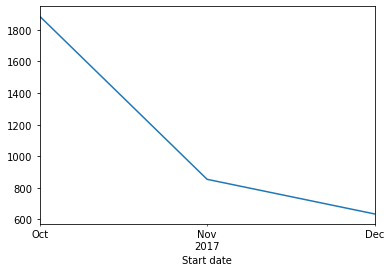

In [ ]:
rides\
.resample('M', on = 'Start date')\
['Duration seconds']\
.mean()\
.plot()

<AxesSubplot:xlabel='Start date'>

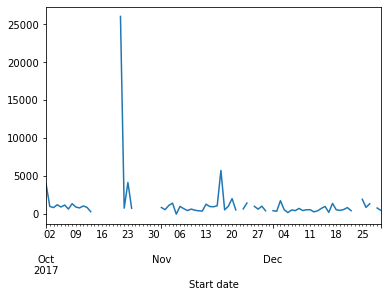

In [ ]:
# Average duration by day using 'D'
rides\
.resample('D', on = 'Start date')\
['Duration seconds']\
.mean()\
.plot()

## Timezones in Pandas

## Note:

all the pandas datetime-related attributs are within the .dt accessor. This means that every attributes must have .dt.

In [ ]:
# datetime objects are navive and we have to fix it 
rides['Duration'].dt.total_seconds().min()

-3346.0

In [ ]:
# making the datetime object aware by .tz_localize which add a UTC offset
rides['Start date'].head(3)\
.dt.tz_localize('America/New_York')

0   2017-10-01 15:23:25-04:00
1   2017-10-01 15:42:57-04:00
2   2017-10-02 06:37:10-04:00
Name: Start date, dtype: datetime64[ns, America/New_York]

Try to set a timezone...

rides['Start date'] = rides['Start date']\
.dt.tz_localize('America/New_York')

This will create an AmbiguousTimeError we have to fix it by  ambiguous='NaT'

In [ ]:
# Handle ambiguous datetimes
rides['Start date'] = rides['Start date']\
.dt.tz_localize('America/New_York', ambiguous='NaT')
rides['End date'] = rides['End date']\
.dt.tz_localize('America/New_York', ambiguous='NaT')

In [ ]:
# Re-calculate duration, ignoring bad row
rides['Duration'] = rides['End date']-rides['Start date']
# Find the minimum again
rides['Duration'].dt.total_seconds().min()

116.00000000000001

In [ ]:
# convert a time zone for pandas dataframe by dt.tz_convert()

# Localize the Start date column to America/New_York
rides['Start date'] = rides['Start date'].dt.tz_localize('America/New_York',  ambiguous='NaT')

# Print first value
print(rides['Start date'].iloc[0])

# Convert the Start date column to Europe/London
rides['Start date'] = rides['Start date'].dt.tz_convert('Europe/London')

# Print the new value
print(rides['Start date'].iloc[0])

In [ ]:
# Look at problematic row
# both start and end is set to NaT, so our Durations is also NaT 
rides.iloc[129]

Start date                        NaT
End date                          NaT
Start station number            31615
Start station           6th & H St NE
End station number              31627
End station             3rd & M St NE
Bike number                    W20529
Member type                    Member
Duration                          NaT
Duration seconds              -3346.0
Name: 129, dtype: object

In [ ]:
# Year of first three rows
rides['Start date']\
.head(3)\
.dt.year

0    2017
1    2017
2    2017
Name: Start date, dtype: int64

In [ ]:
# See weekdays for first three rides
rides['Start date']\
.head(3)\
.dt.day_name()

0    Sunday
1    Sunday
2    Monday
Name: Start date, dtype: object

In [ ]:
# Shift the indexes forward one, padding with NaT
# This will make row zero become NaT as well
rides['End date'].shift(1).head(3)

Example:

How long between rides?
For your final exercise, let's take advantage of Pandas indexing to do something interesting. 
How much time elapsed between rides?


Calculate the difference in the Start date of the current row and the End date of the previous row and assign it to rides['Time since'].
Convert rides['Time since'] to seconds to make it easier to work with.
Resample rides to be in monthly buckets according to the Start date.
Divide the average by (60*60) to get the number of hours on average that W20529 waited in the dock before being picked up again.

In [ ]:
# Shift the index of the end date up one; now subract it from the start date
rides['Time since'] = rides['Start date'] - (rides['End date'].shift(1))

# Move from a timedelta to a number of seconds, which is easier to work with
rides['Time since'] = rides['Time since'].dt.total_seconds()

# Resample to the month
monthly = rides.resample('M', on='Start date')

# Print the average hours between rides each month
print(monthly['Time since'].mean()/(60*60))



Start date
2017-10-31    5.519242
2017-11-30    7.256443
2017-12-31    9.202380
Freq: M, Name: Time since, dtype: float64